In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as sm
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()
import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

In [9]:
web_page = requests.get("https://www.worldometers.info/coronavirus")
soup = BeautifulSoup(web_page.text, 'html.parser')
print(soup.prettify())

ort Changes in Numbers
            </h4>
           </div>
           <div class="modal-body">
            <form action="contact_submit.php" id="contactForm" role="form">
             <input name="contact_form" type="hidden" value="1"/>
             <div class="form-group">
              <label class="form_labels" for="countries_select" style="display: block;">
               Country:
              </label>
              <select class="form-control" id="countries_select" name="countries_select" placeholder="Select country">
              </select>
             </div>
             <div class="form-group">
              <label class="form_labels" for="countries_select" style="display: block;">
               Fill in any value you want to report (all fields are optional):
              </label>
             </div>
             <div class="form-group row">
              <div class="col-md-3">
               <label class="form_labels" for="new_cases" style="line-height:34px;">
             

In [11]:
covid_data = soup.find_all("div", class_ = "maincounter-number")
print("Coronavirus: ", covid_data[0].text.strip())
print("Muertes: ", covid_data[1].text.strip())
print("Recovered: ", covid_data[2].text.strip())

Coronavirus:  148,269,762
Muertes:  3,128,353
Recovered:  125,804,602


In [12]:
results = soup.find(id='main_table_countries_today')
content = results.find_all('td')
content

le="font-size:12px;color: grey;text-align:center;vertical-align:middle;">25</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/iraq/">Iraq</a></td>,
 <td style="font-weight: bold; text-align:right">1,037,858</td>,
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+6,536</td>,
 <td style="font-weight: bold; text-align:right;">15,303 </td>,
 <td style="font-weight: bold; 
                                     text-align:right;background-color:red; color:white">+46</td>,
 <td style="font-weight: bold; text-align:right">913,211</td>,
 <td style="font-weight: bold; text-align:right;background-color:#c8e6c9; color:#000">+7,910</td>,
 <td style="text-align:right;font-weight:bold;">109,344</td>,
 <td style="font-weight: bold; text-align:right">528</td>,
 <td style="font-weight: bold; text-align:right">25,342</td>,
 <td style="font-weight: bold; text-align:right">374</td>,
 <td style="font-weight: bold; text-align:right">

In [14]:
clean_data = ''
for data in content:
    clean_data += data.text.strip() + '|'
    clean_data = clean_data.replace('+', '')
clean_data

|241|6,221,767|166,954|37,266,452|Africa|73|4,141|6|3|0.2|136|42|Saudi Arabia|413,174|958|6,913|13|396,604|1,047|9,657|1,290|11,720|196|16,643,921|472,110|35,254,297|Asia|85|5,100|2|27|0.4|274|43|Bulgaria|397,500||15,907||324,943||56,650|746|57,562|2,303|2,447,180|354,375|6,905,625|Europe|17|434|3|||8,203|44|Malaysia|395,718|2,776|1,449|13|369,556|1,803|24,713|300|12,100|44|9,121,319|278,912|32,703,216|Asia|83|22,570|4|85|0.4|756|45|Slovakia|380,010|99|11,531|36|255,300||113,179|341|69,576|2,111|2,589,457|474,103|5,461,802|Europe|14|474|2|18|7|20,722|46|Ecuador|374,775|1,413|18,300|123|318,598||37,877|635|20,983|1,025|1,263,275|70,729|17,860,716|South America|48|976|14|79|7|2,121|47|Panama|362,967||6,209||352,833||3,925|105|83,060|1,421|2,353,895|538,656|4,369,939|North America|12|704|2|||898|48|Belarus|353,846|896|2,502|9|344,206|649|7,138||37,457|265|5,788,360|612,733|9,446,784|Europe|27|3,776|2|95|1.0|756|49|Greece|334,436|1,307|10,087|80|291,153||33,196|811|32,215|972|7,870,447|758

In [16]:
import re
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

for c in countries:
    pattern = c+"[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
        print(data.group())

USA|32,829,725|5,336|586,177|25|25,382,148|2,317|6,861,400|9,901|98,711|1,762|439,743,062|1,322,198|332,584,983|
Spain|3,488,469|6,500|77,738|49|3,182,894|5,259|227,837|2,356|74,588|1,662|46,199,597|987,813|46,769,568|
Italy|3,971,114|8,444|119,539|301|3,398,763|16,539|452,812|2,849|65,759|1,979|57,271,836|948,379|60,389,176|
France|5,498,044||102,858||4,363,098||1,032,088|5,978|84,079|1,573|74,505,035|1,139,371|65,391,401|
Germany|3,307,769|9,568|82,344|107|2,910,100|16,200|315,325|5,049|39,377|980|54,061,332|643,568|84,002,536|
UK|4,406,946|2,064|127,434|6|4,197,672|3,844|81,840|243|64,640|1,869|151,605,651|2,223,714|68,176,784|
Turkey|4,667,281|37,312|38,711|353|4,121,671|48,027|506,899|3,563|54,859|455|46,153,151|542,483|85,077,620|
Iran|2,417,230|21,026|70,070|496|1,892,229|14,712|454,931|5,244|28,483|826|15,313,657|180,443|84,867,186|
Russia|4,771,372|8,803|108,588|356|4,394,639|6,631|268,145|2,300|32,684|744|128,000,000|876,799|145,985,566|
Brazil|14,340,787||390,925||12,809,169

In [18]:
cov_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
cov_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


            total_cases
date                   
2021-04-21   31862094.0
2021-04-22   31929351.0
2021-04-23   31991750.0
2021-04-24   32045113.0
2021-04-25   32077178.0


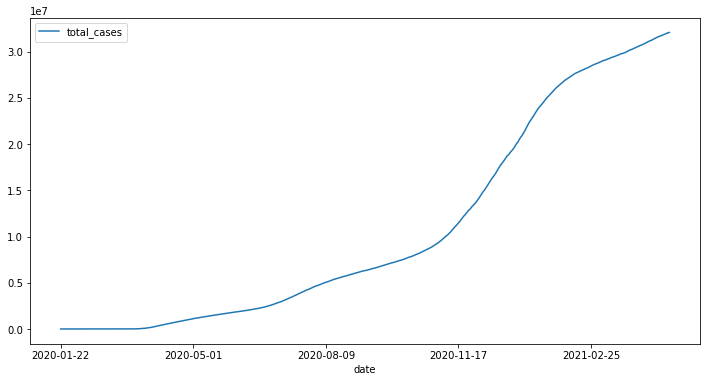

In [29]:
country_df = cov_df.location.unique()
us_indexer = cov_df[cov_df['location']=='United States'].index
es_indexer = cov_df[cov_df['location']=='Spain'].index
us_tc = cov_df.loc[us_indexer, 'date': 'total_cases']
us_tc = us_tc.dropna()
us_tc.set_index('date', inplace=True)
us_tc.plot(figsize=(12,6))
print(us_tc.tail())

In [31]:
us_pct = cov_df.loc[us_indexer, 'date': 'total_cases_per_million']
us_pct = us_pct.dropna()
us_pct.set_index('date', inplace=True)
es_pct = cov_df.loc[es_indexer, 'date': 'total_cases_per_million']
es_pct = es_pct.dropna()
es_pct.set_index('date', inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=us_pct.index, y=us_pct.total_cases_per_million, mode='lines', name='USA'))
fig.add_trace(go.Scatter(x=es_pct.index, y=es_pct.total_cases_per_million, mode='lines', name='Spain'))
fig.show()